<a href="https://colab.research.google.com/github/Amrutha123BS/Cardiovascular-Risk-prediction/blob/main/Capstone_project_2_Cardiovascular_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description of DataSet Given:**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

**Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

**Data Description**

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**Predict variable (desired target)**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

**Data Exploration**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
crp_df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project - Supervised ML- Cardiovascular risk prediction/data_cardiovascular_risk.csv")

In [4]:
crp_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [5]:
crp_df.shape

(3390, 17)

In [6]:
def crp_dfinfo():
    temp = pd.DataFrame(index=crp_df.columns)
    temp['data_type'] = crp_df.dtypes
    temp["count of non null values"] = crp_df.count()
    temp['NaN values'] = crp_df.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(crp_df)).round(4)*100 # or crp_df.isnull().mean()
    temp['unique_count'] = crp_df.nunique()
    return temp 
crp_dfinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
id,int64,3390,0,0.00,3390
age,int64,3390,0,0.00,39
education,float64,3303,87,2.57,4
sex,object,3390,0,0.00,2
is_smoking,object,3390,0,0.00,2
cigsPerDay,float64,3368,22,0.65,32
BPMeds,float64,3346,44,1.30,2
prevalentStroke,int64,3390,0,0.00,2
prevalentHyp,int64,3390,0,0.00,2
diabetes,int64,3390,0,0.00,2


We Have NaN values

In [13]:
crp_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
# Id column can be dropped off
crp_df.drop("id",axis=1,inplace= True)

In [10]:
crp_df.corr()
  
# # plotting correlation heatmap
# dataplot = sb.heatmap(crp_df.corr(), cmap="YlGnBu", annot=True)
  
# # displaying heatmap
# plt.show()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.172559,-0.192335,0.124376,0.059038,0.308826,0.107875,0.274028,0.404845,0.221896,0.138176,-0.002596,0.116135,0.224927
education,-0.172559,1.000000,0.011126,-0.019920,-0.034194,-0.084817,-0.052013,-0.020781,-0.137195,-0.060801,-0.133313,-0.046980,-0.038732,-0.052751
cigsPerDay,-0.192335,0.011126,1.000000,-0.037080,-0.042057,-0.079312,-0.049016,-0.024703,-0.100834,-0.068785,-0.100996,0.066759,-0.068797,0.066778
BPMeds,0.124376,-0.019920,-0.037080,1.000000,0.119402,0.259548,0.071316,0.083299,0.263729,0.201217,0.087932,0.018107,0.064490,0.088020
prevalentStroke,0.059038,-0.034194,-0.042057,0.119402,1.000000,0.071652,0.010115,-0.010832,0.057568,0.047235,0.018602,-0.019184,0.023607,0.068627
prevalentHyp,0.308826,-0.084817,-0.079312,0.259548,0.071652,1.000000,0.082565,0.159680,0.699285,0.612897,0.300464,0.150815,0.086658,0.166544
diabetes,0.107875,-0.052013,-0.049016,0.071316,0.010115,0.082565,1.000000,0.059080,0.124011,0.061165,0.089112,0.039742,0.620211,0.103681
totChol,0.274028,-0.020781,-0.024703,0.083299,-0.010832,0.159680,0.059080,1.000000,0.199159,0.154974,0.114305,0.087458,0.062723,0.094306
sysBP,0.404845,-0.137195,-0.100834,0.263729,0.057568,0.699285,0.124011,0.199159,1.000000,0.781908,0.333864,0.178262,0.143090,0.212703
diaBP,0.221896,-0.060801,-0.068785,0.201217,0.047235,0.612897,0.061165,0.154974,0.781908,1.000000,0.380498,0.174904,0.071499,0.135979


Education has lowest correlation.

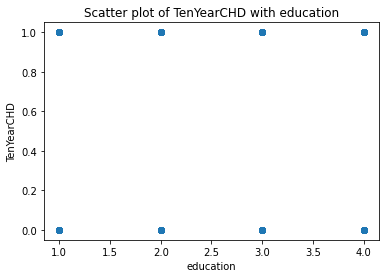

In [11]:
plt.scatter(crp_df['education'], crp_df['TenYearCHD'])
plt.title('Scatter plot of TenYearCHD with education')
plt.xlabel('education')
plt.ylabel('TenYearCHD')
plt.show()

In [15]:
crp_df.drop('education',inplace=True,axis=1)

In [16]:
crp_df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [17]:
crp_df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [18]:
print(f'the percentage of people having heart deisease is {(511/3390)*100}')
print(f'the percentage of people having No heart deisease is {(2879/3390)*100}')

the percentage of people having heart deisease is 15.073746312684367
the percentage of people having No heart deisease is 84.92625368731564


In [19]:
ncrp = crp_df.copy()
ncrp.shape

(3390, 15)

In [20]:
X = ncrp.drop(['TenYearCHD'], axis=1)
y = ncrp['TenYearCHD']

In [21]:
y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

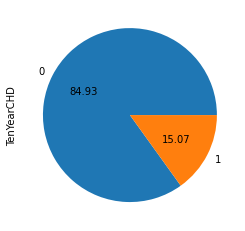

In [22]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')